# 0.1.3.1: TRY6 data exploration

We received an updated version of TRY (v6), so let's explore it to see how it differs from TRY v5.

## Imports and config

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from src.conf.conf import get_config
from src.conf.environment import log

cfg = get_config()

try_dir = Path(cfg.raw_dir, "TRY_6_gapfilled_for_distribution")

## Explore and extract zipped data

In [2]:
for item in try_dir.iterdir():
    print(item)

data/raw/TRY_6_gapfilled_for_distribution/TRY6_gapfilled_for_distribution.zip


Let's see what's inside.

In [3]:
import zipfile

with zipfile.ZipFile(try_dir / "TRY6_gapfilled_for_distribution.zip", "r") as zip_ref:
    # print all items in the zip file
    zip_ref.printdir()

File Name                                             Modified             Size
TRY6_gapfilled_for_distribution/               2024-07-09 18:08:26            0
TRY6_gapfilled_for_distribution/TRY6_gapfilled_filtered_2.csv.zip 2024-07-09 17:59:44    295894458
__MACOSX/TRY6_gapfilled_for_distribution/._TRY6_gapfilled_filtered_2.csv.zip 2024-07-09 17:59:44          220
TRY6_gapfilled_for_distribution/.DS_Store      2024-10-22 10:35:00         6148
__MACOSX/TRY6_gapfilled_for_distribution/._.DS_Store 2024-10-22 10:35:00          120
TRY6_gapfilled_for_distribution/Boxplots_predicted_filter_SD_err_norm.pdf 2024-07-09 17:33:50       536606
__MACOSX/TRY6_gapfilled_for_distribution/._Boxplots_predicted_filter_SD_err_norm.pdf 2024-07-09 17:33:50          276
TRY6_gapfilled_for_distribution/ReadMe_TRY060_GapfilledData.docx 2023-10-12 07:09:48        21956
__MACOSX/TRY6_gapfilled_for_distribution/._ReadMe_TRY060_GapfilledData.docx 2023-10-12 07:09:48          343
TRY6_gapfilled_for_distribution/B

There's a Word document inside, so let's check that out before diving into the data.

In [4]:
from docx import Document

# Open the main zip file
with zipfile.ZipFile(try_dir / "TRY6_gapfilled_for_distribution.zip", "r") as zip_ref:
    # Open the nested zip file containing the .docx file
    with zip_ref.open(
        "TRY6_gapfilled_for_distribution/ReadMe_TRY060_GapfilledData.docx"
    ) as docx_file:
        # Read the .docx file
        document = Document(docx_file)

In [5]:
for para in document.paragraphs:
    print(para.text)

26 June 2023

Trait Data:

All trait data (all species, public and restricted data, and datasets not for distribution) for the following traits from TRY version 6.0:


In addition, for taxonomic hierarchy and plausibility test: TRY6_AccSpecies_update_plantgrowthform.csv

Data preprocessing, gap-filling, and post-processing: Preprocessing.R 

Data preprocessing:

Combination of different Trait IDs for gapfilling:

#SLA
workdata$TraitID[workdata$TraitID %in% c(3086, 3115, 3116)] <- 3117

#Leaf area
workdata$TraitID[workdata$TraitID %in% c(3108, 3110)] <- 3112
workdata$TraitID[workdata$TraitID %in% c(3109, 3111)] <- 3113

#Leaf length
workdata$TraitID[workdata$TraitID %in% c(940)] <- 144


Traits were filtered based on information in the TRY database using functions from the rtry package.

Before gap-filling, filtered trait data were first transformed to normal distribution (if appropriate) and then z-transformed to a mean of zero and standard deviation of one. Data for back-transformatio

It looks like the documentation hasn't been updated recently as it references several files that don't exist in the archive, but it does shed some light on some new trait IDs, in particular SLA, Leaf Area, and Leaf Length. Let's open the data.

Looks like the trait data is inside another nested zipfile. We can enter both and then load the CSV into memory from there.

In [6]:
with zipfile.ZipFile(try_dir / "TRY6_gapfilled_for_distribution.zip", "r") as zip_ref:
    with zip_ref.open(
        "TRY6_gapfilled_for_distribution/TRY6_gapfilled_filtered_2.csv.zip"
    ) as nested_zipfile:
        with zipfile.ZipFile(nested_zipfile, "r") as nested_zip_ref:
            with nested_zip_ref.open(nested_zip_ref.namelist()[0]) as csvfile:
                df = pd.read_csv(csvfile, index_col=0)

df.head()

,ObservationID,Species,Genus,Family,X.X3117.,X.X14.,X.X50.,X.X146.,X.X3120.,X.X224.,...,X.X223.,X.X237.,X.X614.,X.X351.,X.X6.,X.X95.,X.X138.,X.X1080.,X.X78.,X.X4.
1,1288703,Aa sp,Aa,Orchidaceae,9.450981,26.351648,2.795776,21.425933,6.791860,6.298046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3028602,Aa sp,Aa,Orchidaceae,9.527612,26.392788,2.788531,21.472466,6.794565,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20038,Abarema adenophora,Abarema,Fabaceae,10.809759,22.267708,2.074678,23.723020,1.749591,2.027723,...,26.496278,6.283451,5689.131802,0.845113,2.143766,60.594448,35.114286,NaN,3.426695,0.581636
4,20245,Abarema adenophora,Abarema,Fabaceae,11.419825,24.438512,2.158819,22.006957,1.787113,2.022243,...,26.582657,6.336021,5313.609814,0.851212,2.027711,60.609553,29.540982,NaN,3.502891,0.569486
5,251630,Abarema adenophora,Abarema,Fabaceae,12.559145,24.406430,2.004283,22.037481,1.747104,1.849333,...,25.657953,6.040829,4069.435371,NaN,2.976581,NaN,36.527854,NaN,3.850584,NaN


In [7]:
trait_cols = [col for col in df.columns if col.startswith("X.")]
nobs = len(df)
nspec = df.Species.nunique()
ntraits = len(trait_cols)

print(f"Number of observations: {nobs:,}")
print(f"Number of species: {nspec:,}")
print("Number of traits:", ntraits)

Number of observations: 1,056,032
Number of species: 74,245
Number of traits: 37


Woah, let's recall the same stats from TRY v5:
```console
Number of observations: 609,355
Number of species: 52,104
Number of traits: 33
```

### Takeaways

TRY v6 builds on v5 by...

In [8]:
def pct_change(left: int | float, right: int | float):
    change = right - left
    return (change / left) * 100

print(f"Number of observations: +{pct_change(609355, nobs):.2f}%")
print(f"Number of species: +{pct_change(52104, nspec):.2f}%")
print(f"Number of traits: +{pct_change(33, ntraits):.2f}%")

Number of observations: +73.30%
Number of species: +42.49%
Number of traits: +12.12%


Given that a major limitation in linking trait values with GBIF and sPlot is that TRY v5 only contained ~30% of the species observed, this could significantly improve the quality of both gridded datasets.

## Reduce the trait data to species means

In [11]:
df_mn = df[["Species", *trait_cols]].groupby("Species").mean()

## Filter outliers and log-transform long-tailed traits

TRY traits have previously contained issues with outliers, perhaps due to gap-filling errors or unit mismatching (e.g. in TRY v5, the maximum tree height was $5.9 \times 10^8$). First let's take a look at the distributions to see if outliers seem to be playing a large role.

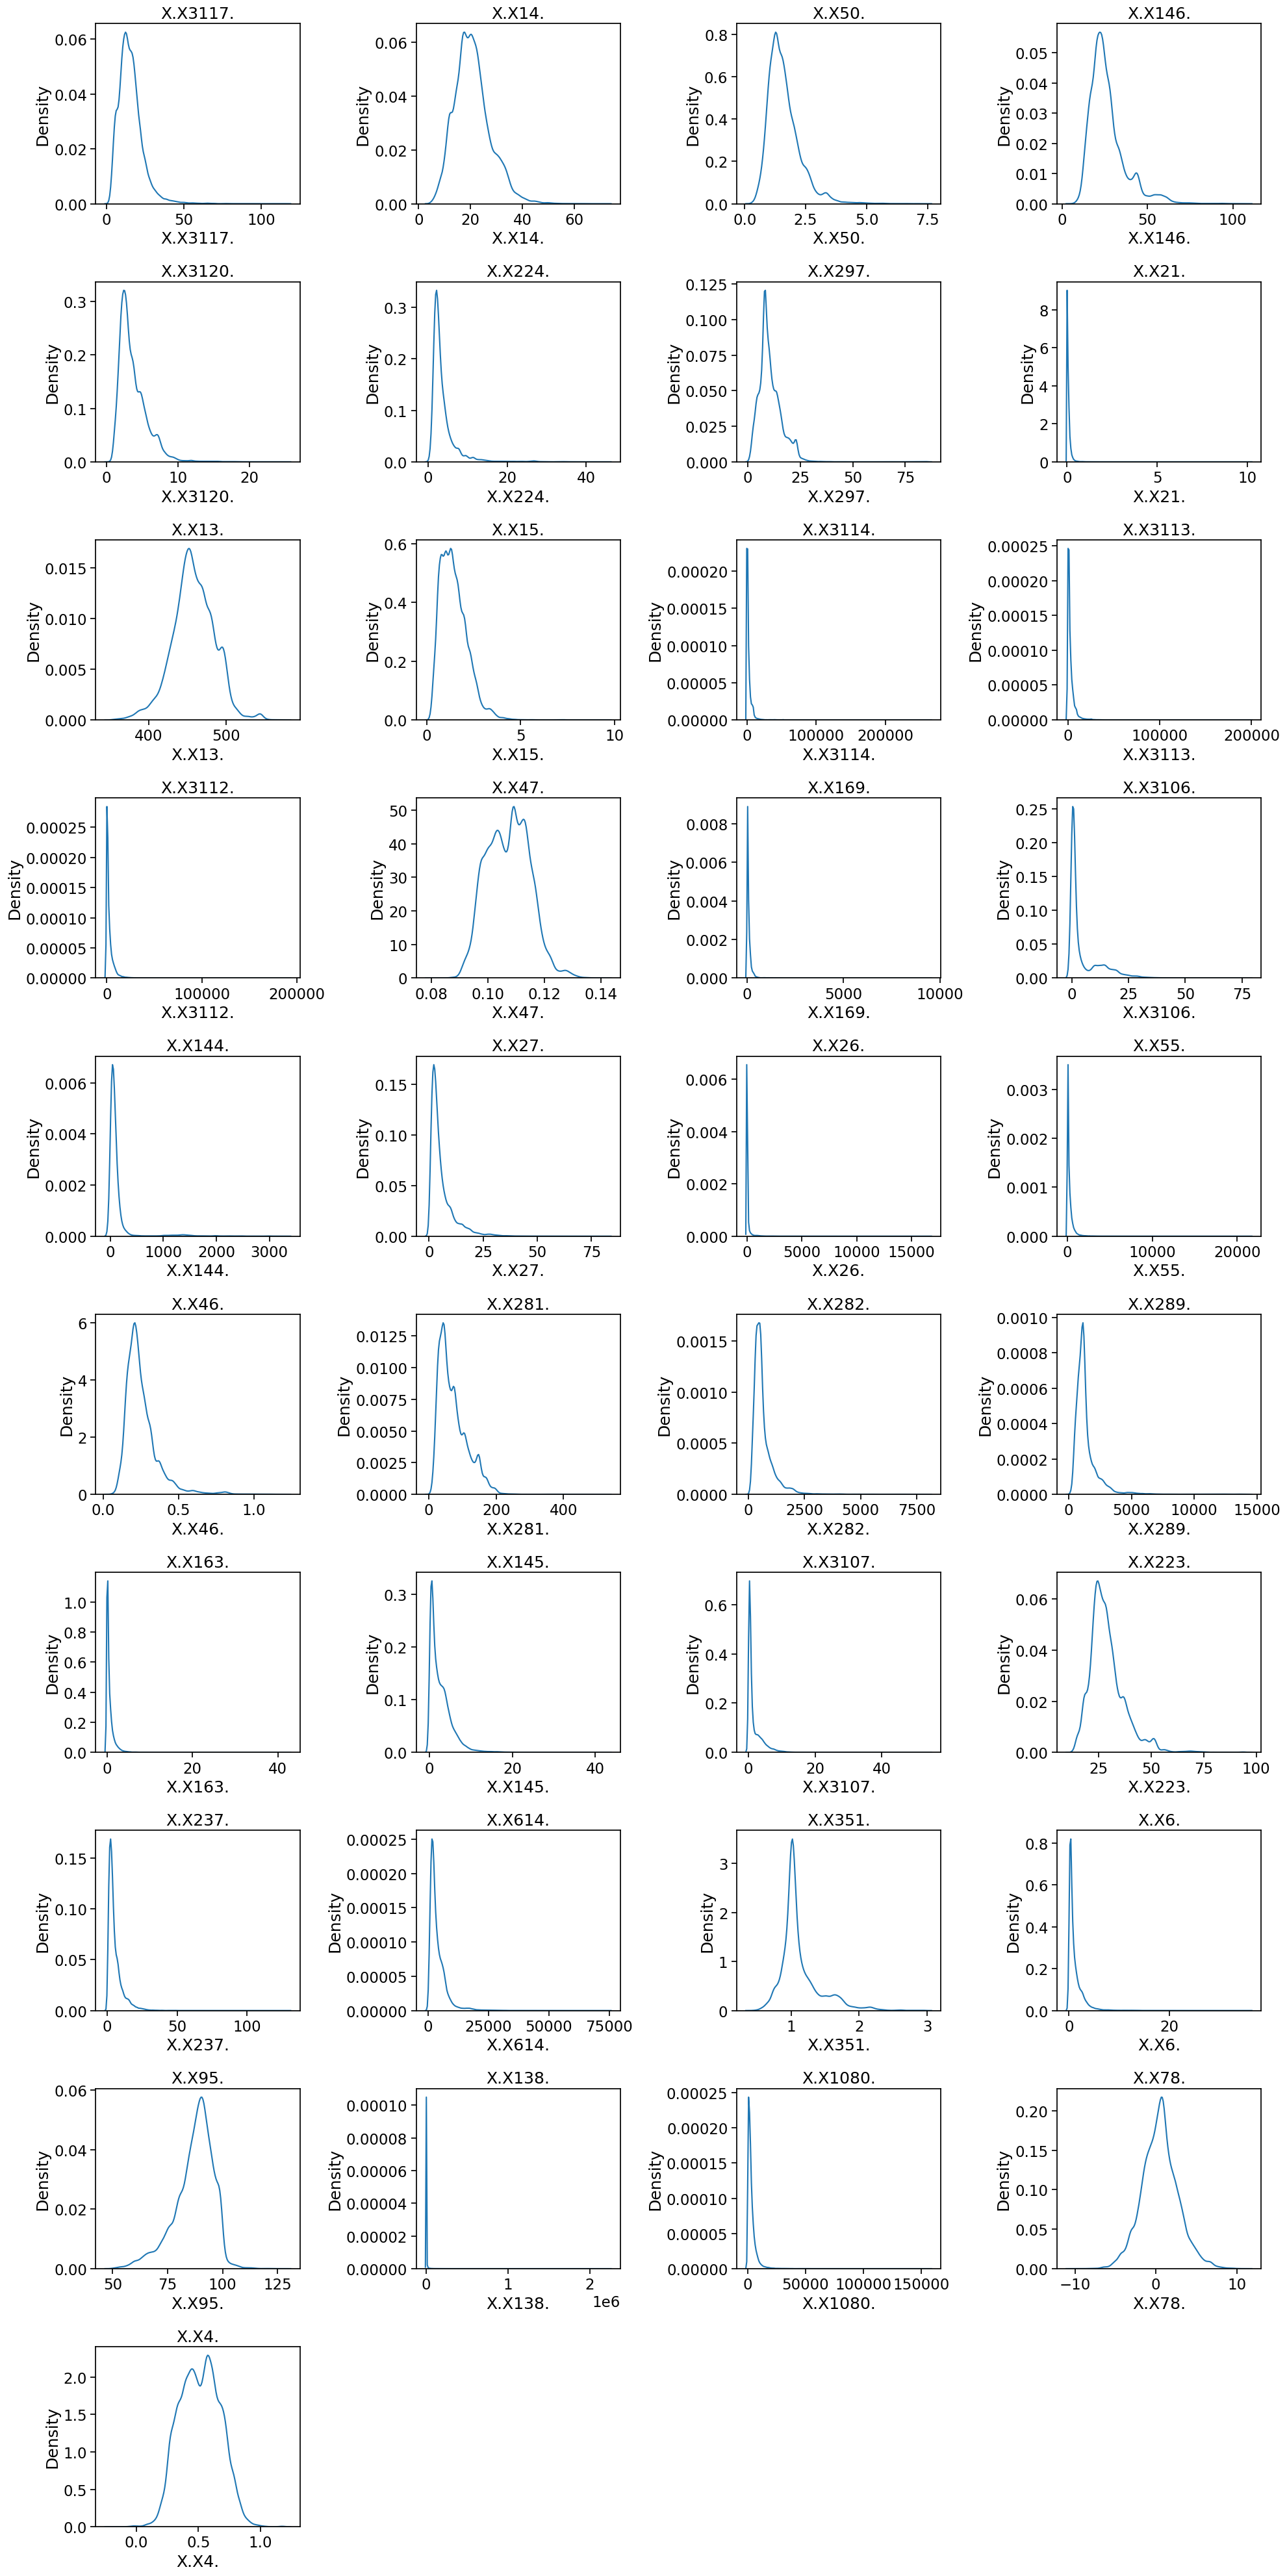

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_distributions(df, ncols=4):
    nrows = int(np.ceil(df.shape[1] / ncols))
    figsize = (ncols * 5, nrows * 4)
    _, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        sns.kdeplot(df[col], ax=axes[i])
        axes[i].set_title(col)

    # clean up empty axes
    for i in range(len(df.columns), len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# plot distributions for all cols starting with X
with sns.plotting_context("notebook", font_scale=1.5):
    plot_distributions(df_mn.filter(like="X."))

These values look more reasonable than the unfiltered v5, but there remain some very long tails. Let's transform those traits with long tails to see if that can normalize the distributions. Our transformation flavor of choice will be a Yeo-Johnson power transformation, as it can robustly perform approximate normalization of input data that comes from a variety of native distributions. Yeo-Johnson transformation does require the derivation of a transformation parameter $\lambda$, so we will need to make sure to save the parameters for each trait for later back-transformation.

In [68]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method="yeo-johnson")
df_mn_transformed = pd.DataFrame(
    pt.fit_transform(df_mn), columns=df_mn.columns, index=df_mn.index
)

In [69]:
from scipy.stats import yeojohnson

col = df_mn_transformed.filter(like="X.").columns[0]
lm = pt.lambdas_[0]

# Backtransform
inv = yeojohnson(df_mn_transformed[col], lm)

In [71]:
df_mn[col]

Species
ACAENA NOVAE-ZELANDIAE       12.697673
ADIANTUM CAPILLUS-VENERIS    34.456072
ALISMA PLANTAGO-AQUATICA     24.002259
APERA SPICA-VENTI            22.278174
ARCTOSTAPHYLOS UVA-URSI       6.801525
                               ...    
Zygophyllum uitenhagense      5.910760
Zygophyllum xanthoxylon       6.696606
Zygophyllum xanthoxylum       6.239320
Zygotritonia bongensis             NaN
Zygotritonia nyassana              NaN
Name: X.X3117., Length: 74245, dtype: float64

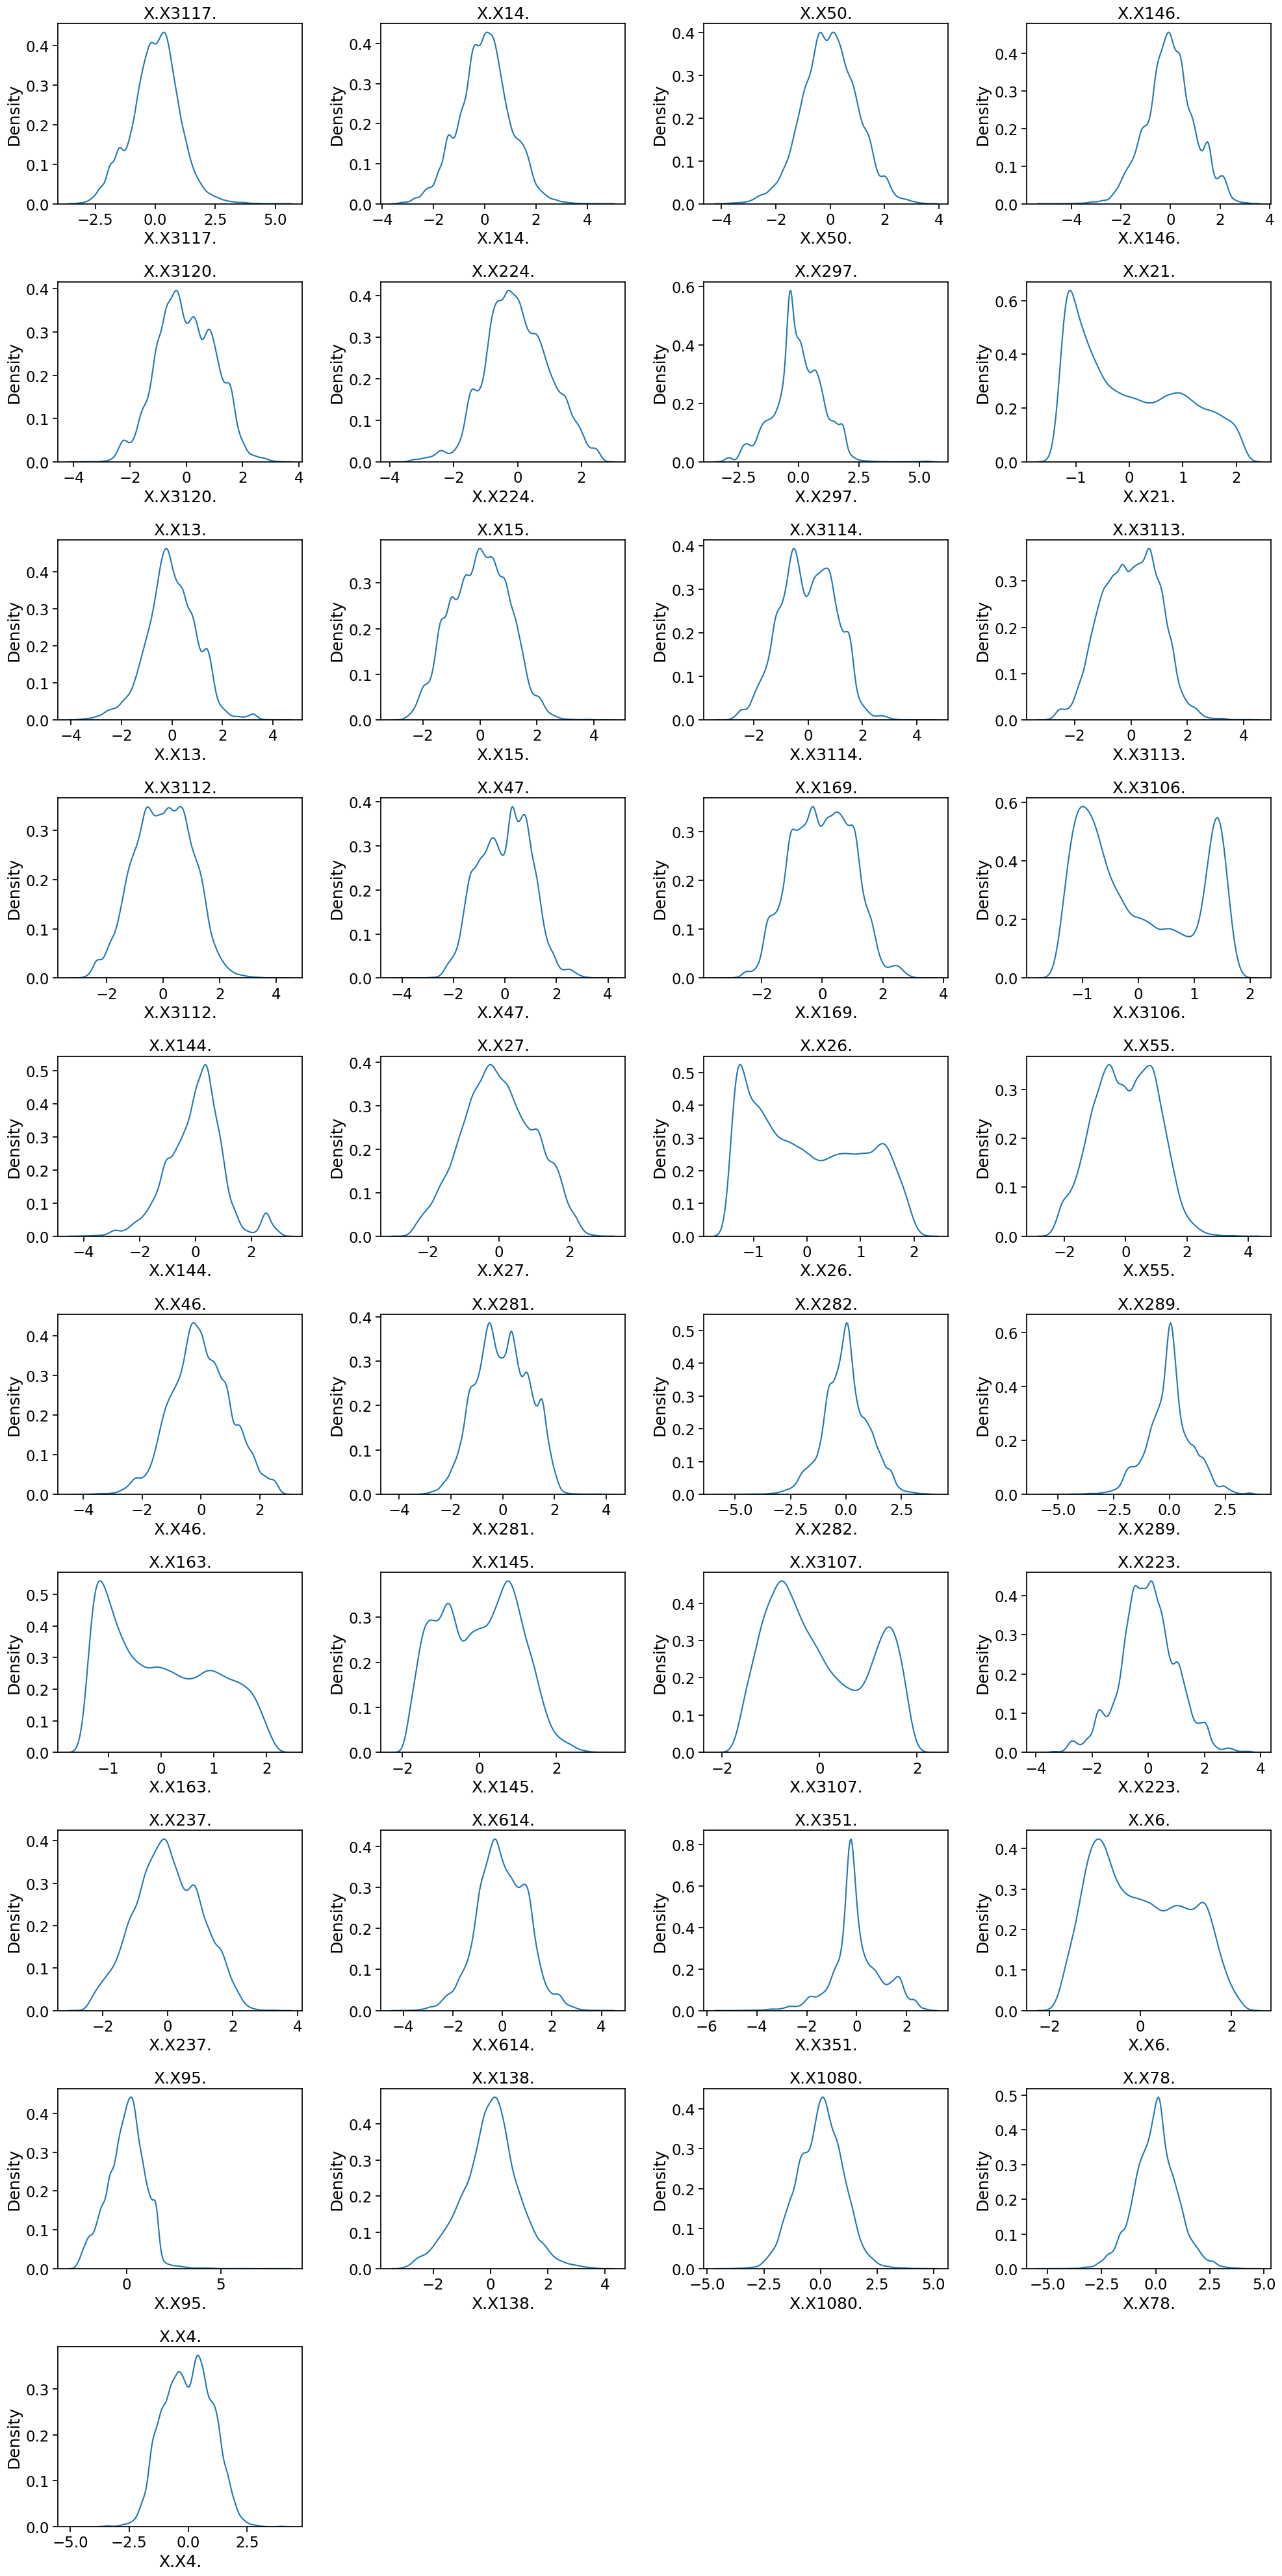

In [25]:
# plot distributions for all cols starting with X
with sns.plotting_context("notebook", font_scale=1.5):
    plot_distributions(df_mn_transformed.filter(like="X."))

And save the lambdas for later use.

In [ ]:
lambda_df = pd.DataFrame({"feature": pt.feature_names_in_, "lambda": pt.lambdas_})

## Match the trait IDs with their actual names

In [37]:
ttable = pd.read_csv(
    Path(cfg.raw_dir, "TRY_trait_table_2024114.txt"), sep="\t", skiprows=[0, 1, 2]
).drop(columns=["Unnamed: 5"])
ttable.head()

,TraitID,Trait,ObsNum,ObsGRNum,AccSpecNum
0,2957,Bark calcium (Ca) content per bark dry mass,30,30.0,5
1,617,Bark carbon (C) content per bark dry mass,772,534.0,274
2,3790,Bark carbon (C) content per dry mass (alive bark),3,3.0,1
3,829,Bark carbon (C) isotope signature (delta 13C),13,13.0,1
4,830,Bark carbon/nitrogen (C/N) ratio,13,13.0,1


In [40]:
cols = [col for col in df.columns if col.startswith("X.")]

for col in cols:
    num = get_trait_number_from_id(col)
    name = ttable.loc[ttable["TraitID"] == int(num), "Trait"].values[0]
    print(f"- {num} # {name}")

- 3117 # Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or exclu
- 14 # Leaf nitrogen (N) content per leaf dry mass
- 50 # Leaf nitrogen (N) content per leaf area
- 146 # Leaf carbon/nitrogen (C/N) ratio
- 3120 # Leaf water content per leaf dry mass (not saturated)
- 224 # Species genotype: chromosome cDNA content
- 297 # Wood rays per millimetre (wood ray density)
- 21 # Stem diameter
- 13 # Leaf carbon (C) content per leaf dry mass
- 15 # Leaf phosphorus (P) content per leaf dry mass
- 3114 # Leaf area (in case of compound leaves undefined if leaf or leaflet, undefined if petiole is in- or e
- 3113 # Leaf area (in case of compound leaves: leaflet, undefined if petiole is in- or excluded)
- 3112 # Leaf area (in case of compound leaves: leaf, undefined if petiole in- or excluded)
- 47 # Leaf dry mass per leaf fresh mass (leaf dry matter content, LDMC)
- 169 # Stem conduit density (vessels and tracheids)
- 3106 # Plant height vegetative
- 144